example :
When predicting the virality of a new hashtag, you might use a classification model and calculate the confidence interval for the AUC score to quantify uncertainty.

In [5]:
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

import numpy as np

we will generate an example dataset after importing the libraries for analysis.

In [6]:
X, y = make_classification(n_samples = 1000, n_features = 20, n_classes = 2, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

we will use random forest for classification

In [7]:
model = RandomForestClassifier(random_state = 42)

In [8]:
model.fit (X_train, y_train)

RandomForestClassifier(random_state=42)

Making the predictions

In [9]:
y_probs = model.predict_proba(X_test)[:, 1]

# predicting the probabilities of the positive class

calculating the auc score

In [12]:
auc_score = roc_auc_score(y_test, y_probs)
auc_score

0.9379459350819013

An auc with 0.93 says that the model is almost 93% giving correct predictions.
An auc score should be between 0 and 1 with 0 as 100% false predictions 1 being 100 correct predictions.

In [16]:
# adjusting the functions to return bootstrapped AUC scores for visualization

def bootstrap_auc(y_true, y_probs, n_bootstraps = 1000, random_state = 42):
  rng = np.random.RandomState(random_state)
  bootstrapped_scores = []

  for i in range(n_bootstraps):
    indices = rng.randint(0, len(y_probs), len(y_probs))

    if len(np.unique(y_true[indices])) < 2:
      continue

    score = roc_auc_score(y_true[indices], y_probs[indices])
    bootstrapped_scores.append(score)

  sorted_scores = np.array(bootstrapped_scores)
  confidence_lower = np.percentile(sorted_scores, 2.5)
  confidence_upper = np.percentile(sorted_scores, 97.5)

  return bootstrapped_scores, confidence_lower, confidence_upper

In [17]:
conf_int_lower, conf_int_upper, bootstrapped_scores = bootstrap_auc(y_test, y_probs)

In [18]:
conf_int_lower

[0.9154146634615384,
 0.8577621379028968,
 0.9344561688311688,
 0.92388383629599,
 0.9536842105263159,
 0.9515901771336555,
 0.9469172932330826,
 0.93562424969988,
 0.9378251300520207,
 0.907967170453408,
 0.9283697953422724,
 0.9430610385666565,
 0.9234770484770485,
 0.9025610244097639,
 0.9207204433497537,
 0.9213092644465193,
 0.9374737284573349,
 0.9357070707070707,
 0.9438265884049017,
 0.9407575757575757,
 0.939995996396757,
 0.9459554395824971,
 0.944911858974359,
 0.9516306522609044,
 0.9239598997493734,
 0.9399230691365522,
 0.9253341372726359,
 0.9317543155359294,
 0.9433838383838384,
 0.947878787878788,
 0.9239701555275326,
 0.9373437343734373,
 0.9163747372635372,
 0.9658313204508857,
 0.9157915791579159,
 0.9542316926770709,
 0.9486294517807123,
 0.9205665024630542,
 0.9585334133653461,
 0.9585971259169933,
 0.9658465846584658,
 0.9267638424941795,
 0.9474822366388631,
 0.944327731092437,
 0.9206516290726817,
 0.9259485924112607,
 0.9313931393139314,
 0.9423558897243107,
 

In [19]:
conf_int_upper

0.9028613244107196

In [20]:
bootstrapped_scores

0.9669993305130694

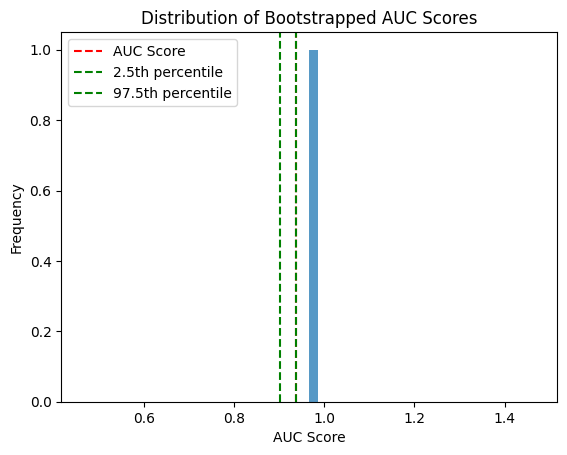

In [29]:
# Calculate the mean of the confidence intervals to represent them as single lines
mean_conf_int_lower = np.mean(conf_int_lower)
mean_conf_int_upper = np.mean(conf_int_upper)

plt.hist(bootstrapped_scores, bins=50, alpha=0.75)
plt.axvline(auc_score, color='red', linestyle='--', label='AUC Score')

# Use the mean values for plotting the vertical lines
plt.axvline(mean_conf_int_lower, color='green', linestyle='--', label='2.5th percentile')
plt.axvline(mean_conf_int_upper, color='green', linestyle='--', label='97.5th percentile')
plt.title('Distribution of Bootstrapped AUC Scores')
plt.xlabel('AUC Score')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

The output histogram displays the bootstrapped AUC scores as a distribution, showcasing the variability in the AUC score that might arise due to the random sampling of the data. The red dashed line marks the AUC score calculated from the test set, while the green dashed lines mark the lower and upper bounds of the 95% confidence interval.

To find if longer tweets have high engagement scores ?

In [30]:
from scipy import stats

tweet_lengths = np.random.randint(20, 280, 100)
engagement_scores = tweet_lengths * 0.5 + np.random.normal(0, 10, 100)

In [31]:
corr_coefficient, _ = stats.pearsonr(tweet_lengths, engagement_scores)

print(f"Pearson Correlation Coefficient: {corr_coefficient:.3f}")

Pearson Correlation Coefficient: 0.958


The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between -1 and 1 that measures the strength and direction of the relationship between two variables.

- High Degree: Values between ±0.50 and ±1 suggest a strong correlation.

- Moderate Degree: Values between ±0.30 and ±0.49 indicate a moderate correlation.

- Low Degree: Values below +0.29 are considered a weak correlation. No Correlation: A value of zero implies no relationship.

Performing a two-sample t-test to compare engagement scores between two groups

In [32]:
from scipy.stats import ttest_ind

# Simulated engagement scores for A/B groups
group_a = np.random.normal(200, 50, 100)
group_b = np.random.normal(205, 50, 100)

In [33]:
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

T-statistic: -0.782, P-value: 0.4354


The t-test results in a T-statistics, indicate no statistically significant difference between the groups.